In [1]:
!pip install pandas
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
#import files
machines = pd.read_csv('PdM_machines.csv')
errors = pd.read_csv('PdM_errors.csv')
failures = pd.read_csv('PdM_failures.csv')
maintenances = pd.read_csv('PdM_maint.csv')

##  Machines

In [6]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [7]:
machines.shape

(100, 3)

In [8]:
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


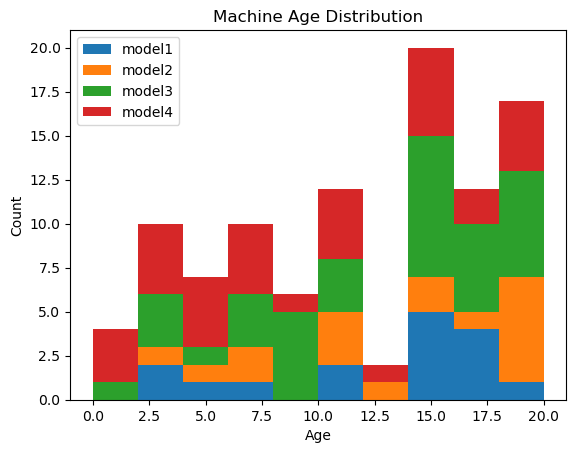

In [9]:
model1_data = machines.loc[machines['model'] == 'model1', 'age']
model2_data = machines.loc[machines['model'] == 'model2', 'age']
model3_data = machines.loc[machines['model'] == 'model3', 'age']
model4_data = machines.loc[machines['model'] == 'model4', 'age']

plt.hist([model1_data, model2_data, model3_data, model4_data], stacked=True, label=['model1', 'model2', 'model3', 'model4'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Machine Age Distribution')
plt.legend()

plt.show()

## Errors

In [10]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [11]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


<Axes: xlabel='errorID', ylabel='count'>

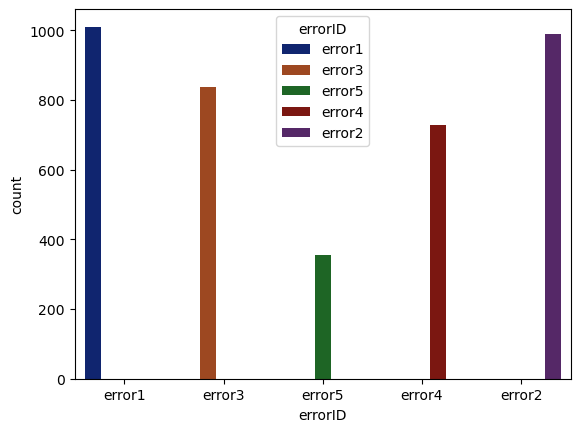

In [14]:
sns.countplot(x='errorID', data=errors, hue='errorID', palette='dark')

In [15]:
errors['datetime'] = pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")

## Failures

In [16]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


<Axes: xlabel='failure', ylabel='count'>

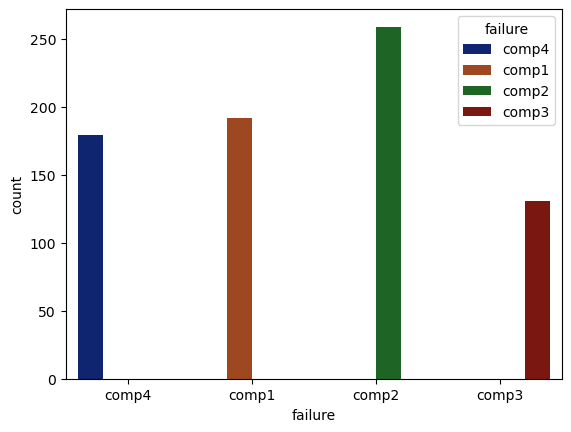

In [19]:
sns.countplot(x='failure', data=failures, hue='failure', palette='dark')

In [20]:
failures['datetime'] = pd.to_datetime(
    maintenances['datetime'], format="%Y-%m-%d %H:%M:%S")

## Maintenances

In [21]:
maintenances['datetime'] = pd.to_datetime(
    maintenances['datetime'], format="%Y-%m-%d %H:%M:%S")
maintenances['comp'] = maintenances['comp'].astype('object')

print("Total number of maintenance records: %d" % len(maintenances.index))
maintenances.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


<Axes: xlabel='comp', ylabel='count'>

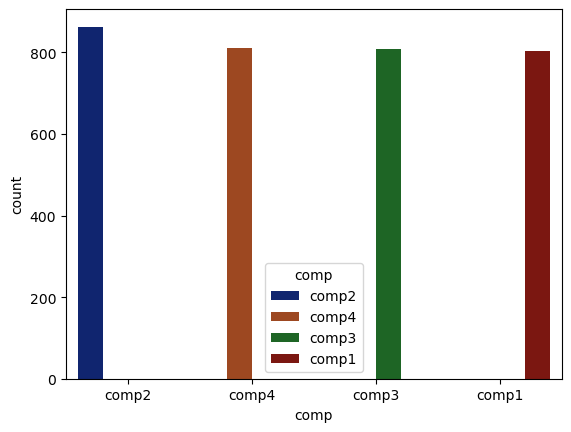

In [23]:
sns.countplot(x='comp', data=maintenances, hue='comp', palette='dark')

## Telemetry/ Sensor Data

In [25]:
telemetry = pd.read_csv('PdM_telemetry .csv')
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [26]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

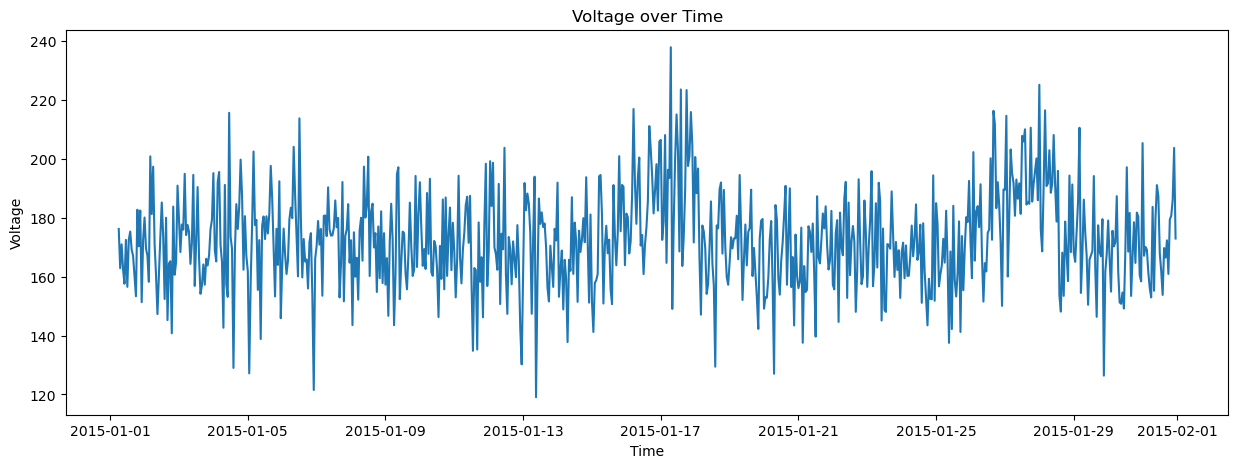

In [27]:
# Exploring voltage fluctuation using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'volt']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['volt'])
plt.title('Voltage over Time')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.show()

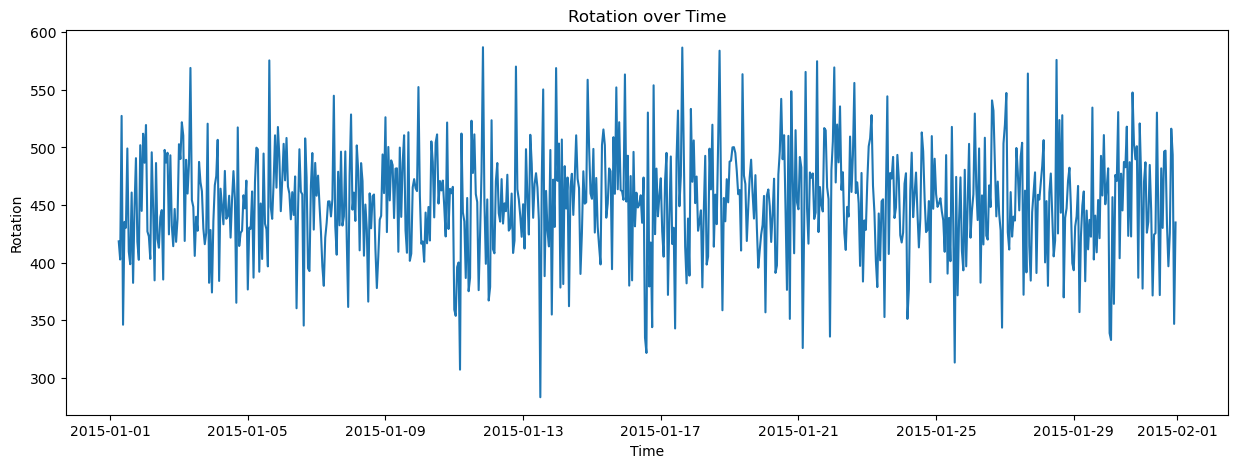

In [28]:
# Exploring rotate fluctuation using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'rotate']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['rotate'])
plt.title('Rotation over Time')
plt.xlabel('Time')
plt.ylabel('Rotation')
plt.show()

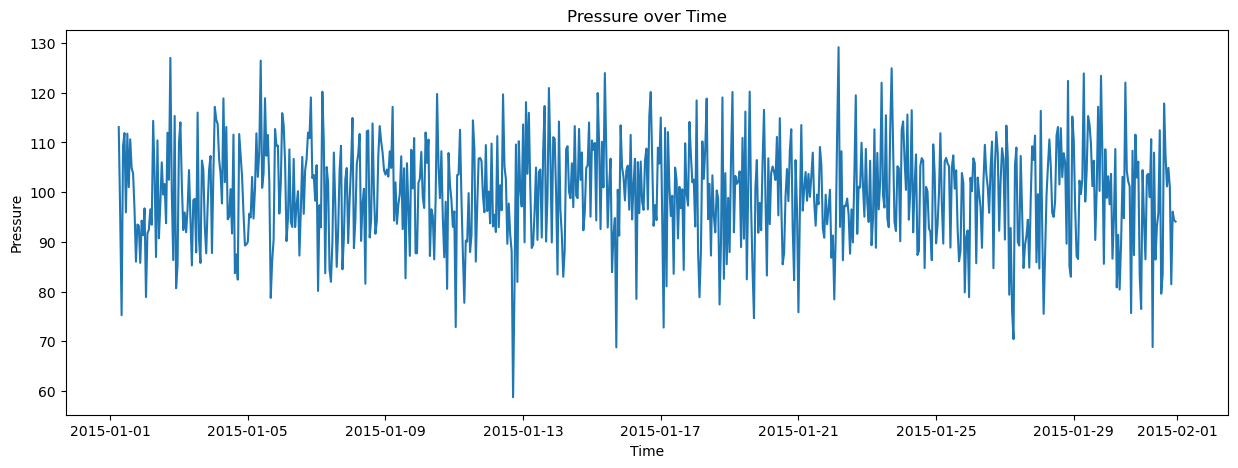

In [29]:
# Exploring voltage pressure using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'pressure']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['pressure'])
plt.title('Pressure over Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.show()

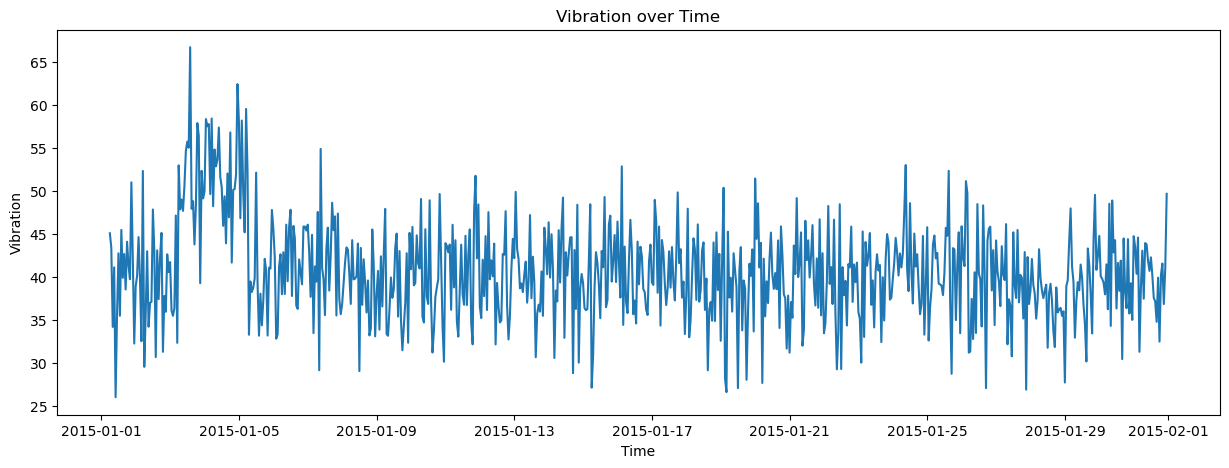

In [30]:
# Exploring vibration fluctuation using line graph (of 1 month)
filtered_df = telemetry.loc[
    (telemetry['machineID'] == 1) & 
    (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
    (telemetry['datetime'] < pd.to_datetime('2015-02-01')), 
    ['datetime', 'vibration']
]

plt.figure(figsize=(15, 5))
plt.plot(filtered_df['datetime'], filtered_df['vibration'])
plt.title('Vibration over Time')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.show()

## Creation of FinalDataset

In [31]:
telemetry_day = telemetry.groupby(["machineID", "datetime"]).agg(
    volt_avg=('volt', 'median'),
    rotate_avg=('rotate', 'median'),
    pressure_avg=('pressure', 'median'),
    vibration_avg=('vibration', 'median')
).reset_index()

In [32]:
telemetry_day.head()

,machineID,datetime,volt_avg,rotate_avg,pressure_avg,vibration_avg
0,1,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686
1,1,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973
2,1,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847
3,1,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144
4,1,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511


In [33]:
max_date = telemetry_day["datetime"].max()
min_date = telemetry_day["datetime"].min()
print(min_date)
print(max_date)

2015-01-01 06:00:00
2016-01-01 06:00:00


In [34]:
# Pivot maintenance DataFrame
maint_pivot = maintenances.groupby(["machineID", "datetime"])['comp'].value_counts().unstack().fillna(0)
telemetry_day_maint = telemetry_day.merge(maint_pivot, on=["datetime", "machineID"], how="left").fillna(0)
error_pivot = errors.groupby(["machineID", "datetime"])['errorID'].value_counts().unstack().fillna(0)
tel_maint_error = telemetry_day_maint.merge(error_pivot, on=["datetime", "machineID"], how="left").fillna(0)
fail_pivot = failures.groupby(["machineID", "datetime"])['failure'].value_counts().unstack().fillna(0)

fail_pivot.columns = ['fail_' + col for col in fail_pivot.columns]
finalData = tel_maint_error.merge(fail_pivot, on=["datetime", "machineID"], how="left").fillna(0)

In [35]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   machineID      876100 non-null  int64         
 1   datetime       876100 non-null  datetime64[ns]
 2   volt_avg       876100 non-null  float64       
 3   rotate_avg     876100 non-null  float64       
 4   pressure_avg   876100 non-null  float64       
 5   vibration_avg  876100 non-null  float64       
 6   comp1          876100 non-null  float64       
 7   comp2          876100 non-null  float64       
 8   comp3          876100 non-null  float64       
 9   comp4          876100 non-null  float64       
 10  error1         876100 non-null  float64       
 11  error2         876100 non-null  float64       
 12  error3         876100 non-null  float64       
 13  error4         876100 non-null  float64       
 14  error5         876100 non-null  float64       
 15  

In [36]:
finalData.shape

(876100, 19)

In [37]:
finalData

,machineID,datetime,volt_avg,rotate_avg,pressure_avg,vibration_avg,comp1,comp2,comp3,comp4,error1,error2,error3,error4,error5,fail_comp1,fail_comp2,fail_comp3,fail_comp4
0,1,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,100,2016-01-01 02:00:00,179.438162,395.222827,102.290715,50.771941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876096,100,2016-01-01 03:00:00,189.617555,446.207972,98.180607,35.123072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876097,100,2016-01-01 04:00:00,192.483414,447.816524,94.132837,48.314561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876098,100,2016-01-01 05:00:00,165.475310,413.771670,104.081073,44.835259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
finalData.to_csv('output.csv', index=False)

## Final Output Data and Analysis

In [39]:
df = pd.read_csv('output.csv')

In [40]:
df.head()

,machineID,datetime,volt_avg,rotate_avg,pressure_avg,vibration_avg,comp1,comp2,comp3,comp4,error1,error2,error3,error4,error5,fail_comp1,fail_comp2,fail_comp3,fail_comp4
0,1,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   machineID      876100 non-null  int64  
 1   datetime       876100 non-null  object 
 2   volt_avg       876100 non-null  float64
 3   rotate_avg     876100 non-null  float64
 4   pressure_avg   876100 non-null  float64
 5   vibration_avg  876100 non-null  float64
 6   comp1          876100 non-null  float64
 7   comp2          876100 non-null  float64
 8   comp3          876100 non-null  float64
 9   comp4          876100 non-null  float64
 10  error1         876100 non-null  float64
 11  error2         876100 non-null  float64
 12  error3         876100 non-null  float64
 13  error4         876100 non-null  float64
 14  error5         876100 non-null  float64
 15  fail_comp1     876100 non-null  float64
 16  fail_comp2     876100 non-null  float64
 17  fail_comp3     876100 non-nul

In [42]:
df['datetime'] = pd.to_datetime(df['datetime'])

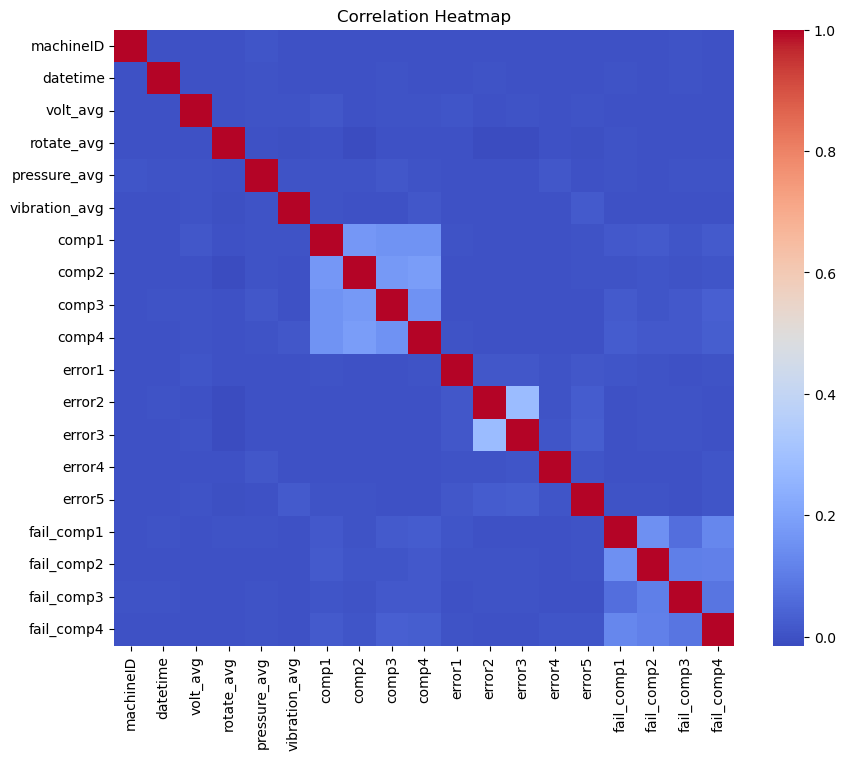

In [43]:
# Calculate pairwise correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

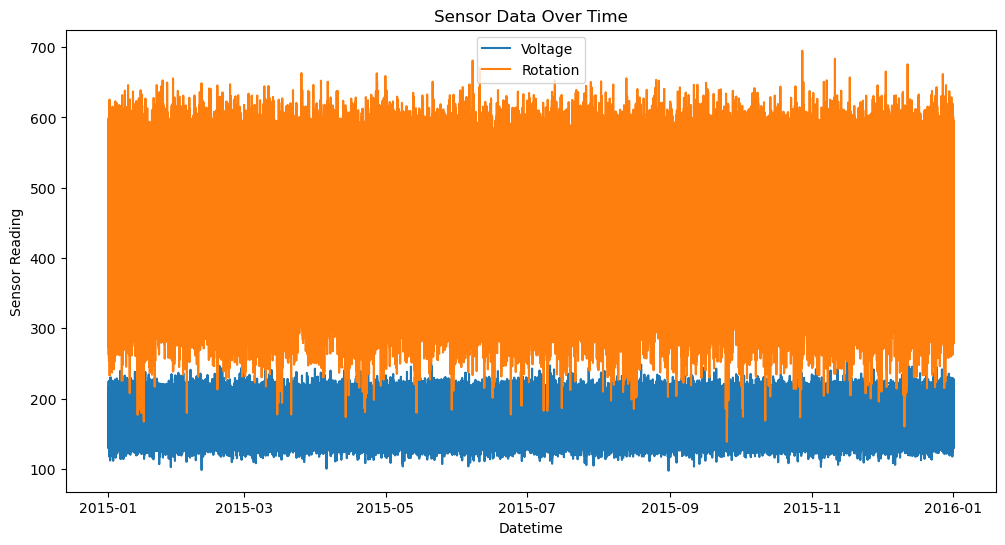

In [44]:
# Plot sensor data over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['volt_avg'], label='Voltage')
plt.plot(df['datetime'], df['rotate_avg'], label='Rotation')

plt.xlabel('Datetime')
plt.ylabel('Sensor Reading')
plt.title('Sensor Data Over Time')
plt.legend()
plt.show()

In [45]:
# Create a new feature by calculating the sum of all error columns
df['total_errors'] = df[['error1', 'error2', 'error3', 'error4', 'error5']].sum(axis=1)
df['total_errors']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
876095    0.0
876096    0.0
876097    0.0
876098    0.0
876099    0.0
Name: total_errors, Length: 876100, dtype: float64

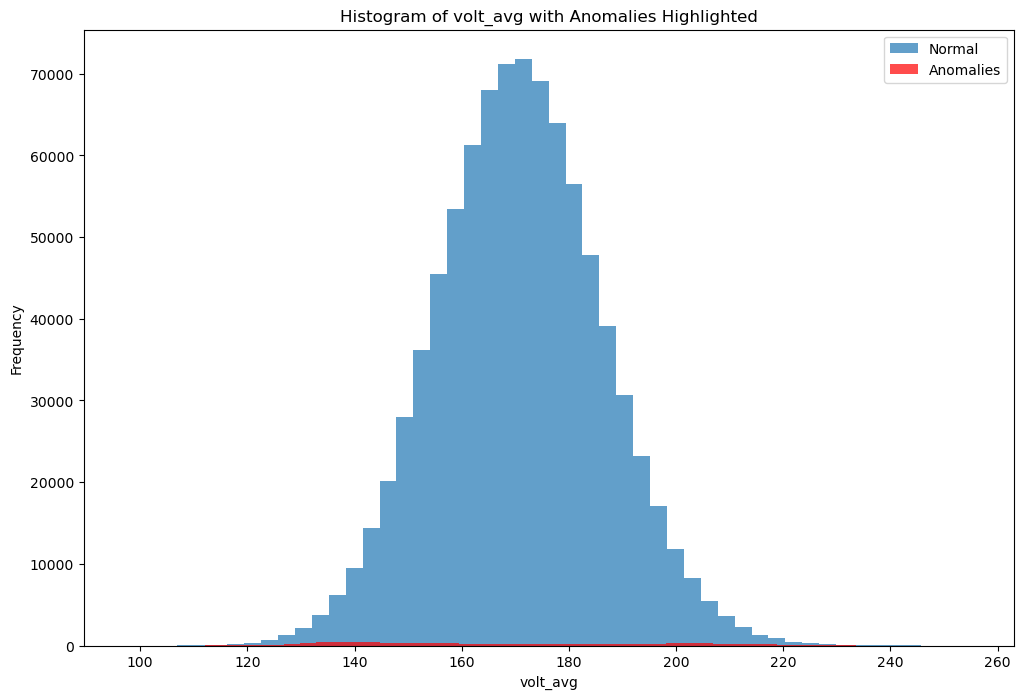

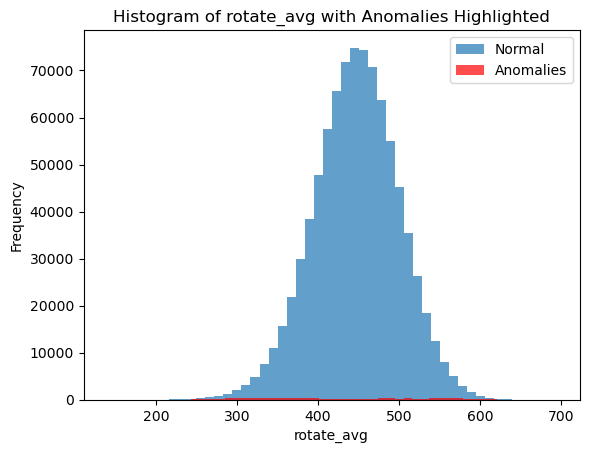

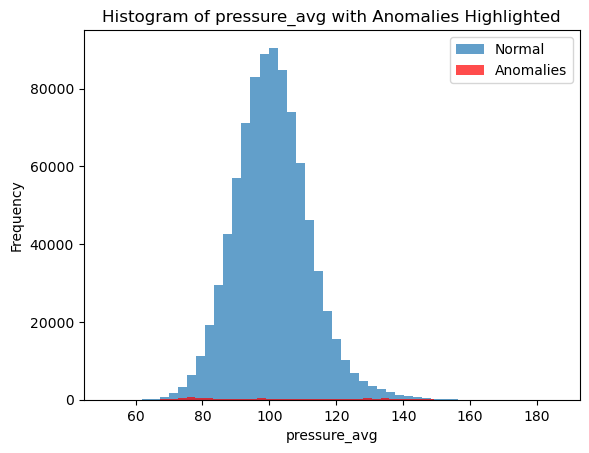

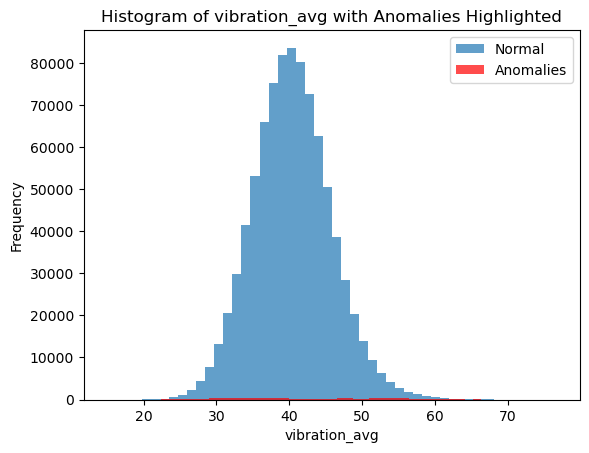

In [46]:
from sklearn.ensemble import IsolationForest
columns_to_plot = ['volt_avg', 'rotate_avg', 'pressure_avg', 'vibration_avg']

iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination based on expected anomaly rate
iso_forest.fit(df[columns_to_plot])

# Predict anomalies
anomaly_labels = iso_forest.predict(df[columns_to_plot])
anomalies = df[anomaly_labels == -1]

# Now you can plot the histograms with anomalies highlighted
plt.figure(figsize=(12, 8))
for column in columns_to_plot:
    plt.hist(df[column], bins=50, alpha=0.7, label='Normal')
    plt.hist(anomalies[column], bins=50, color='red', alpha=0.7, label='Anomalies')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} with Anomalies Highlighted')
    plt.legend()
    plt.show()


## Model Training and Prediction

In [47]:
!pip install scikit-learn
!pip install keras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 MB 1.9 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.5 MB/s eta 0:00:0000:0100:01
  Using cached ml_dtypes-0.3.2-cp310-cp310-macosx_10_9_universal2.whl (389 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.1/295.1 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

X = df.drop(['machineID', 'datetime', 'fail_comp1'], axis=1).values
y = df['fail_comp1'].values

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [1]:
# Predict failure probabilities for the selected records
def predict_with_actual(X, y):
    # Reshape data for LSTM
    X = X.reshape((X.shape[0], X.shape[2]))  # Reshape back to original shape
    X = scaler.transform(X)
    X = X.reshape((X.shape[0], 1, X.shape[1]))
    
    # Predict probabilities
    probabilities = model.predict(X)
    # Convert probabilities to class labels (0 or 1)
    predicted_classes = (probabilities > 0.5).astype(int)
    # Print the predicted probabilities and actual values
    for i in range(len(probabilities)):
        print("Predicted Class:", predicted_classes[i][0])
        print("Actual Value of fail_comp1:", y[i])

In [2]:
record_1 = X_test[[0]]   #index
predict_with_actual(record_1, y_test[:1]) 

NameError: name 'X_test' is not defined

In [44]:
record_2 = X_test[[1]] 
predict_with_actual(record_2, y_test[1:2])

1/1 [==============================] - 0s 11ms/step
Predicted Class: 0
Actual Value of fail_comp1: 0.0


In [45]:
accuracy = accuracy_score(y_test, y_pred_classes)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.999805958223947


In [46]:
y_test, y_pred_classes

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))